In [2]:
!pip install simplemma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 MB 9.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import unicodedata
import nltk
import seaborn as sns
from collections import Counter
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import simplemma
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/resep-trad.csv", encoding='latin-1') # Try 'latin-1' encoding. If this doesn't work, try 'cp1252'
df.head()

,Id,Daerah Asal,Judul Resep,Bahan,Langkah Pembuatan
0,1,Aceh,Mie Aceh,"1 bungkus mie kering pipih, ¼ buah kubis, iri...",Siapkan bahan bumbu halus. Blender hingga halu...
1,2,Aceh,Ayam Tangkap,"500 gr dada ayam, 5 siung bawang merah, 3 siun...",Siapkan ayam yang sudah dicuci bersih. Potong ...
2,3,Aceh,Pacri Nanas,"1 buah nanas matang, 3 sdm kelapa sangrai atau...","Pertama-tama, potong nanas menjadi 4 bagian. H..."
3,4,Aceh,Gulai Kambing,"300 gr daging kambing (potong dadu 3 cm), 1 ba...",Tumis bumbu yang harus dihaluskan pada minyak ...
4,5,Aceh,Bubur Kanji Rumbi,"50 gram beras putih, 50 gram daging sapi (poto...",Hal pertama yang harus kamu lakukan adalah mer...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 80 non-null     int64 
 1   Daerah Asal        80 non-null     object
 2   Judul Resep        80 non-null     object
 3   Bahan              80 non-null     object
 4   Langkah Pembuatan  80 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.2+ KB


In [ ]:
def clean_number(text):
    text = re.sub(r'\w*\d+\w*', '', str(text))
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#casefolding
def token_lower(text):
    text = ''.join(str(text)).lower() # lowercase text
    return text

#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

#menghapus double atau lebih whitespace
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\['
<>:7: DeprecationWarning: invalid escape sequence '\['
<ipython-input-199-9ee9a559a986>:7: DeprecationWarning: invalid escape sequence '\['
  clean_spcl = re.compile('[/(){}\[\]\|@,;]')


In [ ]:
#stopword
#clean stopwords
stopwords_indonesian = set(stopwords.words('indonesian'))

takaran = ['gram', 'sdt', 'sdm', 'buah', 'ml', 'mililiter', 'cup', 'gelas', 'tsp', 'tbsp', 'liter', 'g', 'kg',
           'kilogram', 'pound', 'ons', 'pint', 'pt', 'c', 'celcius', 'f', 'fahrenheit', 'derajat', 'm', 'meter',
           'mm', 'milimeter', 'ruas', 'cm', 'centimeter', 'senti', 'centi', 'siung', 'lembar', 'tangkai', 'batang',
           'butir', 'slice', 'keping', 'kotak', 'papan', 'genggam', 'sejumput', 'bungkus', 'sachet', 'dcc', 'piring',
           'cincin', 'grambahan', 'sendok', 'porsi', 'kantung', 'kantong', 'scoop', 'skup', 'scop', 'loyang', 'segenggam',
           'buntil', 'ikat', 'double', 'botol', 'pack', 'siung','diameter', 'ekor', 'kuntum', 'bonggol', 'gr']

word_to_remove = [ "ditorch", "korea", "lembut", "fillet", "gula", "oles", "protein", "tinggi", "rendah",
                  "sedang", "bersih", "sela", "tambah", "oles", "leleh", "kukus", "marinasi", "mangkuk",
                  "ukur", "hancur", "wadah", "celup", "adaan", "kedalam","sesuai", 'berat', 'bola', 'basah',
                  'bilas', 'buahsaus', 'kapal', 'selam', 'gurih', 'pisah', 'bantu', 'suir', 'hancur', 'tangan',
                  'buahlainnya', 'bagus', 'kualitas', 'sejumputkulit', 'tetessaus', 'putus', 'larut', 'olesisian',
                  'dimemarkan', 'memar',  'bumbu', 'kuah', 'ambil', 'matang', 'belah', 'bulat', 'sangrai', 'jari',
                  'mentah', 'air', 'cair', 'geprek', 'tipis', 'butirkuah', 'adon', 'rendam', 'tumbuk', 'lengkap',
                  'selera', 'sesuai', 'b', 'blender', 'of', 'campur', 'sdtserundeng', 'cacah', 'diam', 'tbmsp',
                  'kaku', 'siram', 'kotor', 'kain', 'saring', 'aneka', 'cocolan', 'dingin', 'celup', 'hias',
                  'gepeng', 'serut', 'sdtsaus', 'sdtbaluran', 'formula', 'secukupnyaisian', 'gramisi',
                  'sdttopping', 'pipil', 'didih', 'bentuk', 'ulek', 'remas', 'sisa', 'larut', 'siram', 'opsional',
                  'cetak', 'tiris', 'direbus', 'disangrai', 'i', 'ii', 'iii', 'iv', 'lebih', 'susut', 'lebar',
                  'diiikat', 'mudah', 'sikat', 'luar', 'geprak', 'tintanya', 'perlembar',   'diseduh', 'batangsaus',
                  'acting', 'secukupnyatumisan', 'secukupnyalainnya', 'secukupnyakaldu', 'lembarlainnya', 'persannya',
                  'ekorbumbu', 'buahkuah', 'sisir', 'adon', 'tumis', 'encerkan', 'oles', 'sela', 'tambah', 'lelehkan',
                  'serong', 'garam', 'minyak', 'bahan', 'a', 'potong', 'ikat', 'pasir', 'goreng', 'optional', 'butir',
                  'jam', 'kupas', 'jenis', 'jala', 'ready', 'to', 'rambut', 'biar', 'asap', 'protein', 'rendah', 'tinggi',
                  'bersih', "simpul", 'lauk', 'pecel', 'hancur', 'baluran', 'didih', 'papanpelapis', 'ampas', 'siungbumbu',
                  'dibagi', 'bagi', 'suir', 'sdtlainnya', 'lengkap', 'ukur', 'lulur', 'biar', 'lapis', 'sesuai', 'isi',
                  'tambah', 'rekat', 'lawan', 'serat', 'lumatkan', 'kerok', 'pecah', 'potong',  'lihat', 'resep', 'versi',
                  'rasa', 'bunda', 'iris', 'suwir', 'lengkap', 'rendam', 'isi', 'dadu', 'literlainnya', 'secukupnyisi',
                  'dasar', 'secukupnyaes', 'kondisi', 'kulkas', 'sdtmerebus', 'secukupnyabubur', 'sdtcuko', 'pembalur',
                  'menggoreng', 'mlisi', 'mlpelengkap', 'mlsambal', 'sdtpencelup', 'siungpelapis', 'api', 'wajan', 'anti',
                  'lengket', 'gigi', 'tusuk',  'menyerong', 'iris', 'kerat', 'buahbahan', 'gramlapisan', 'panas',
                  'secukupnyaperendam', 'buahpencelup', 'basic', 'hasil', 'merebus', 'instan', 'hangat', 'petik', 'korek',
                  'plastik', 'pilih', 'seduh', 'suhu', 'ruang', 'mlfilling', 'sdtgarnish', 'garnish', 'sdtsambal',
                  'lembartaburan', 'minimal', 'secukupnyalapisan', 'kuku', 'jaripelengkap', 'perasannya', 'campur', 'lumur',
                  'ayak', 'menyemat', 'filling', 'orak', 'arik', 'cairkan', 'menit','air', 'sdtperendam', 'mengungkep',
                  'mengunkep', 'aduk', 'mlsaus', 'secukupnyabiang', 'lumur', 'mlbahan', 'sdtbahan', 'lumuran', 'sdttaburan',
                  'sdmtaburan', 'gramtaburan', 'robek', 'sd', 'tlapisan', 'kasur', 'tali', 'lembarpudding', 'alas', 'lentur',
                  'sejumpuhkuah', 'sdmserundeng', 'sdtolesan', 'mltaburan', 'taburan', 'tabur', 'cepat', 'kolcuciwis',
                  'hangatkan', 'lembarbumbu', 'serutan', 'didih', 'lilit', 'campur', 'saring', 'variasi', 'cabut', 'goyang',
                  'seger', 'beli', 'dibentuk', 'seujung', 'pekat', 'dipulung',  'setengah', 'tua', 'es', 'cincang', 'halus',
                  'memarkan', 'secukupnya', 'rajang', 'kasar', 'sampai', 'siangi', 'cuci', 'hancur', 'empuk', 'segar', 'celup',
                  'sobek', 'dingin', 'tengah', 'lebar', 'lidi', 'simpukan', 'simpul', 'kocok', 'kocock', 'lepas', 'tabur',
                  'konsistensi', 'duri', 'goreng', 'minyak', 'rekat', 'makan', 'tiris', 'panas', 'rebus', 'perasan', 'semalaman',
                  'tabur', 'pakai', 'buang', 'tumis', 'rebusan', 'topping', 'sdmbahan', 'tusuk', 'mltopping', 'diblender', 'lapis',
                  'spread', 'biar', 'encer', 'kasir', 'utuh', 'larutkan', 'tumis', 'endapan', 'peta', 'sdmcuko', 'tetes', 'uleg',
                  'sdmisi', 'kupas', 'sdmuleg', 'beserta', 'berseta', 'sebentar', 'goreng', 'aluminium', 'foil', "pera", "tengah",
                  "isi", "encer", "peras","tebal","tiris", "lawan", "puter","pisah", "tambah", "jambal", "didih", "tahan", "penuh",
                  "tahan", "tumbuk","panggang", "ikat", "bening", "mekar", "kotor", "saring", "goreng", "oil"
                 ]

def clean_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stopwords_indonesian and
                     word.lower() not in takaran and word.lower() not in word_to_remove]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import simplemma
def lemmatization(text):
    text = ' '.join(simplemma.lemmatize(word, lang='id') for word in text.split() if word in text)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
from nltk.tokenize import word_tokenize

# Daftar multi-word tokens
multi_word_tokens = ["bunga pepaya", "bunga lawang", "daun salam", "kayu manis", "daun jeruk",
                     "daun kemangi", "daun kari", "asam jawa", "asam kandis",
                     "temu kunci", "jintan hitam", "daun pandan", "kayu secang"]

# Fungsi untuk tokenisasi dan penggabungan multi-word tokens
def tokenize_sentence(sentence):
    # Pertama, tokenisasi kalimat
    words = word_tokenize(sentence.lower())

    # Gabungkan token multi-word
    combined_tokens = []
    i = 0
    while i < len(words):
        # Ambil dua dan tiga kata berurutan
        two_word_token = " ".join(words[i:i+2])
        three_word_token = " ".join(words[i:i+3])

        # Periksa apakah dua atau tiga kata ada dalam daftar multi-word tokens
        if three_word_token in multi_word_tokens:
            combined_tokens.append(three_word_token)
            i += 3
        elif two_word_token in multi_word_tokens:
            combined_tokens.append(two_word_token)
            i += 2
        else:
            combined_tokens.append(words[i])
            i += 1

    # Hasil tokenisasi akhir (tanpa duplikat)
    return combined_tokens


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def bahan_parser(text):
    synonym_mapping = {
        'kubis': 'kol',
        'daun cengkeh': 'ceengkeh',
        'baby kol': 'cuciwis',
        'kembang lawang': 'bunga lawang',
        'kembang kol': 'bunga kol',
        'bawang bombay': 'bawang bombai',
        'terigu': 'tepung terigu',
        'maizena': 'tepung maizena',
        'tapioka': 'tepung tapioka',
        'kental manis': 'susu kental manis',
        'coklat': 'cokelat',
        'mete': 'kacang mete',
        'almond': 'kacang almond',
        'daun kol': 'kol',
        'daging ayam': 'ayam',
        'selasih': 'biji selasih',
        'agar': 'agar agar',
        'cherry': 'buah cherry',
        'belimbing sayur': 'belimbing wuluh',
        'santan instan': 'santan',
        'star anise': 'bunga lawang',
        'pete': 'petai',
        'bawang prei': 'daun bawang',
        'whipcream': 'whipping cream',
        'laos': 'lengkuas',
        'jeruk kasturi': 'lemon cui',
        'tahu sutra': 'tahu jepang',
        'whip cream': 'whipping cream',
        'daun pepaya': 'ganemo'
    }

    text = clean_number(text)
    text = token_lower(text)
    text = clean_punct(text)
    text = _normalize_whitespace(text)
    text = clean_stopwords(text)
    text = lemmatization(text)
    text = tokenize_sentence(text)

    # Replace synonyms using the synonym mapping
    text = [synonym_mapping.get(word, word) for word in text]

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['clean']= df['Bahan'].apply(bahan_parser)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['clean']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean
0,"[mie, kering, pipih, kol, tauge, bakso, sapi, ..."
1,"[dada, ayam, bawang, merah, bawang, putih, kem..."
2,"[nanas, kelapa, koya, kelapa, merah, bubuk, ka..."
3,"[daging, kambing, serai, daun jeruk, asam jawa..."
4,"[beras, putih, daging, sapi, wortel, kentang, ..."
...,...
75,"[daging, sapi, cabe, merah, cabe, rawit, merah..."
76,"[tempe, kacang, tanah, giling, aren, kecap, ma..."
77,"[beras, menanak, nasi, lengkuas, serai, daun s..."
78,"[ayam, u, tumis, kaldu, bubuk, bawang, merah, ..."


In [ ]:
df.to_csv('resep-trad-cleaning.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Korpus rempah-rempah
korpus_rempah = ['daun salam', 'kunyit', 'lengkuas', 'jahe', 'jintan', 'cengkeh', 'pekak', 'kapulaga', 'kiamis', 'kemiri', 'kayu secang', 'ketumbar', 'lada', 'pala', 'andaliman', 'adas', 'asam jawa', 'kluwak', 'asam kandis', 'kencur', 'daun jeruk', 'kecombrang', 'daun kemangi', 'temu kunci', 'jintan hitam', 'serai', 'wijen', 'pandan', 'kemukus']

def ekstrak_rempah(bahan, korpus):
    # Check if bahan is a list, join list into a single string
    if isinstance(bahan, list):
        bahan = ' '.join(bahan)

    # Convert bahan and korpus to lowercase for consistency
    bahan_list = re.findall(r'\b\w+\b', bahan.lower())  # Convert bahan to lowercase
    korpus = [rempah.lower() for rempah in korpus]  # Convert korpus to lowercase

    # Ambil kata yang cocok dengan korpus rempah-rempah
    rempah_terpilih = [word for word in bahan_list if word in korpus]
    return ', '.join(rempah_terpilih)

# Terapkan fungsi ekstraksi ke kolom bahan
df['rempah_terpilih'] = df['clean'].apply(lambda x: ekstrak_rempah(x, korpus_rempah))

# Hasil akhir
print(df[['Judul Resep', 'clean', 'rempah_terpilih']])


            Judul Resep                                              clean  \
0              Mie Aceh  [mie, kering, pipih, kol, tauge, bakso, sapi, ...   
1          Ayam Tangkap  [dada, ayam, bawang, merah, bawang, putih, kem...   
2           Pacri Nanas  [nanas, kelapa, koya, kelapa, merah, bubuk, ka...   
3         Gulai Kambing  [daging, kambing, serai, daun jeruk, asam jawa...   
4     Bubur Kanji Rumbi  [beras, putih, daging, sapi, wortel, kentang, ...   
..                  ...                                                ...   
75         Gulai Terjun  [daging, sapi, cabe, merah, cabe, rawit, merah...   
76  Sate Rangkayo Hitam  [tempe, kacang, tanah, giling, aren, kecap, ma...   
77           Nasi Gemuk  [beras, menanak, nasi, lengkuas, serai, daun s...   
78         Gulai Talang  [ayam, u, tumis, kaldu, bubuk, bawang, merah, ...   
79   Rendang Khas Jambi  [daging, sapi, potong, santan, kelapa, pekak, ...   

                                      rempah_terpilih  
0      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.to_csv('resep-trad-clean.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Code to generate bag of words from the cleaned ingredient list
bags_of_words = [Counter(bahan_parser(ekstrak_rempah(Bahan, korpus_rempah))) for Bahan in df.Bahan]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Find sum of every ingredient using Counter()
sumbags = sum(bags_of_words, Counter())


# Finally, plot the 10 most used ingredients
clean_df = pd.DataFrame.from_dict(sumbags, orient='index').reset_index()
clean_df = clean_df.rename(columns={'index':'Bahan', 0:'count'})
clean_df.to_csv('ingredient_clean.csv')

top_ing = clean_df.sort_values('count', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ingr_only_dict = clean_df['Bahan'].to_dict()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


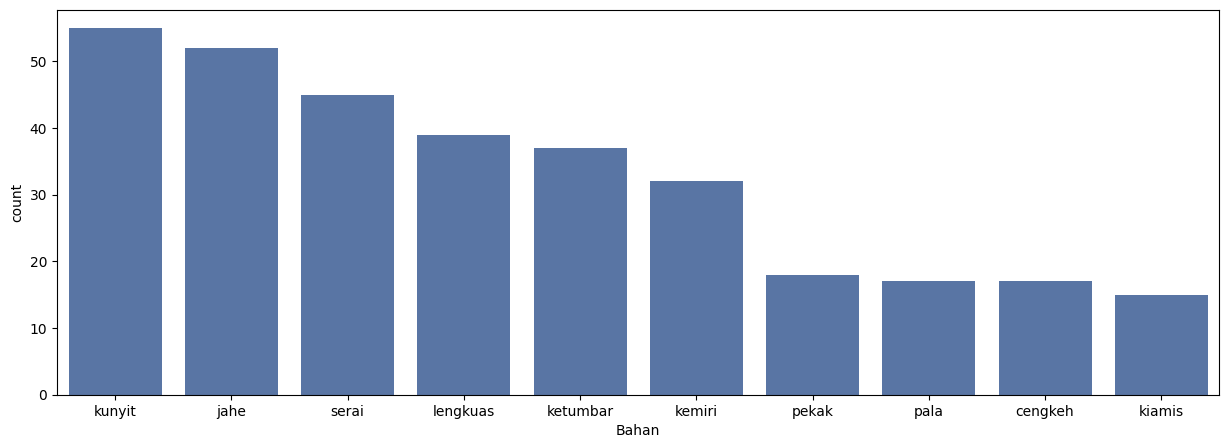

In [ ]:
#Plot top rempah using bag of words
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'Bahan', y = 'count', data = top_ing.head(10))
sns.set_palette("deep")
plt.show()
fig.savefig('ingredient_count_bag_of_words.png')

In [ ]:
# Korpus rempah-rempah
korpus_rempah = ['jintan', 'cengkeh', 'pekak', 'kapulaga', 'kiamis', 'kayu secang', 'lada', 'pala', 'andaliman', 'adas', 'asam jawa', 'kluwak', 'asam kandis', 'kencur', 'kecombrang', 'daun kemangi', 'temu kunci', 'jintan hitam', 'kemukus']

def ekstrak_rempah(bahan, korpus):
    # Check if bahan is a list
    if isinstance(bahan, list):
        bahan = ' '.join(bahan) # Join the list into a single string

    # Pisahkan bahan menjadi kata-kata
    bahan_list = re.findall(r'\b\w+\b', bahan)  # tidak perlu .lower() lagi
    # Ambil kata yang cocok dengan korpus rempah-rempah
    rempah_terpilih = [word for word in bahan_list if word in korpus]
    return ', '.join(rempah_terpilih)

# Terapkan fungsi ekstraksi ke kolom bahan
df['rempah'] = df['clean'].apply(lambda x: ekstrak_rempah(x, korpus_rempah))

# Hasil akhir
print(df[['Judul Resep', 'clean', 'rempah']])

            Judul Resep                                              clean  \
0              Mie Aceh  [mie, kering, pipih, kol, tauge, bakso, sapi, ...   
1          Ayam Tangkap  [dada, ayam, bawang, merah, bawang, putih, kem...   
2           Pacri Nanas  [nanas, kelapa, koya, kelapa, merah, bubuk, ka...   
3         Gulai Kambing  [daging, kambing, serai, daun jeruk, asam jawa...   
4     Bubur Kanji Rumbi  [beras, putih, daging, sapi, wortel, kentang, ...   
..                  ...                                                ...   
75         Gulai Terjun  [daging, sapi, cabe, merah, cabe, rawit, merah...   
76  Sate Rangkayo Hitam  [tempe, kacang, tanah, giling, aren, kecap, ma...   
77           Nasi Gemuk  [beras, menanak, nasi, lengkuas, serai, daun s...   
78         Gulai Talang  [ayam, u, tumis, kaldu, bubuk, bawang, merah, ...   
79   Rendang Khas Jambi  [daging, sapi, potong, santan, kelapa, pekak, ...   

                                      rempah  
0               

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from collections import Counter

# Fungsi untuk menampilkan lebih dari satu rempah dominan
def rempah_dominan(df, top_n=5):
    # Gabungkan rempah berdasarkan daerah asal, mengabaikan entri kosong atau hanya spasi
    rempah_daerah = df.groupby('Daerah Asal')['rempah'].apply(lambda x: ', '.join([item.strip() for item in x if item.strip()])).reset_index()

    # Hitung frekuensi setiap rempah di setiap daerah
    rempah_daerah['Rempah_Frekuensi'] = rempah_daerah['rempah'].apply(lambda x: Counter(x.split(', ')))

    # Ambil n rempah paling sering muncul
    rempah_daerah['Rempah_Dominan'] = rempah_daerah['Rempah_Frekuensi'].apply(lambda x: ', '.join([item[0].strip() for item in x.most_common(top_n) if item[0].strip()]))

    return rempah_daerah[['Daerah Asal', 'Rempah_Dominan']]

# Menampilkan 2 rempah paling sering muncul
hasil = rempah_dominan(df, top_n=5)
print(hasil)


  Daerah Asal                           Rempah_Dominan
0        Aceh   kiamis, pekak, kapulaga, lada, cengkeh
1    Bengkulu         cengkeh, pala, pekak, adas, lada
2       Jambi    pala, cengkeh, adas, kiamis, kapulaga
3      Maluku               pala, kiamis, jintan, lada
4       Medan     lada, cengkeh, pala, pekak, kapulaga
5      Padang   pekak, cengkeh, kiamis, kapulaga, lada
6   Palembang  cengkeh, kapulaga, kiamis, pala, jintan
7        Riau   cengkeh, pala, pekak, kapulaga, kiamis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitl

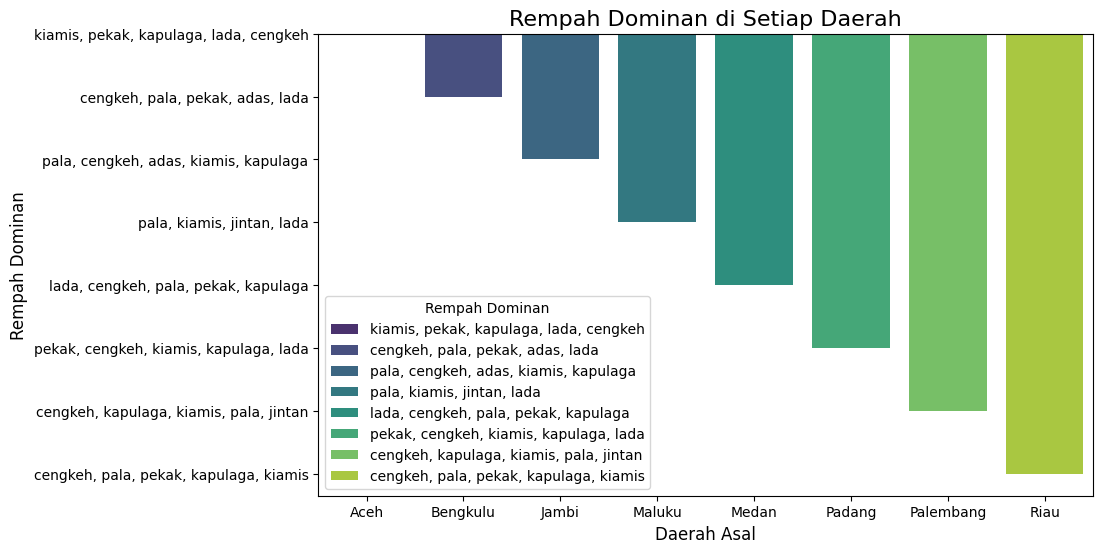

In [ ]:
# Dengan hue berdasarkan rempah dominan
plt.figure(figsize=(10, 6))
sns.barplot(x='Daerah Asal', y='Rempah_Dominan', hue='Rempah_Dominan', data=hasil, palette='viridis', dodge=False)

plt.title('Rempah Dominan di Setiap Daerah', fontsize=16)
plt.xlabel('Daerah Asal', fontsize=12)
plt.ylabel('Rempah Dominan', fontsize=12)
plt.legend(title='Rempah Dominan')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           antecedents            consequents  support  confidence      lift
0             (kemiri)                 (jahe)   0.2750    0.709677  1.091811
1               (jahe)             (ketumbar)   0.3500    0.538462  1.164241
2           (ketumbar)                 (jahe)   0.3500    0.756757  1.164241
3               (jahe)               (kunyit)   0.4750    0.730769  1.270903
4             (kunyit)                 (jahe)   0.4750    0.826087  1.270903
..                 ...                    ...      ...         ...       ...
83       (jahe, serai)     (kunyit, lengkuas)   0.2625    0.600000  1.655172
84  (kunyit, lengkuas)          (jahe, serai)   0.2625    0.724138  1.655172
85     (kunyit, serai)       (jahe, lengkuas)   0.2625    0.636364  1.696970
86   (lengkuas, serai)         (jahe, kunyit)   0.2625    0.724138  1.524501
87          (lengkuas)  (jahe, kunyit, serai)   0.2625    0.583333  1.728395

[88 rows x 5 columns]


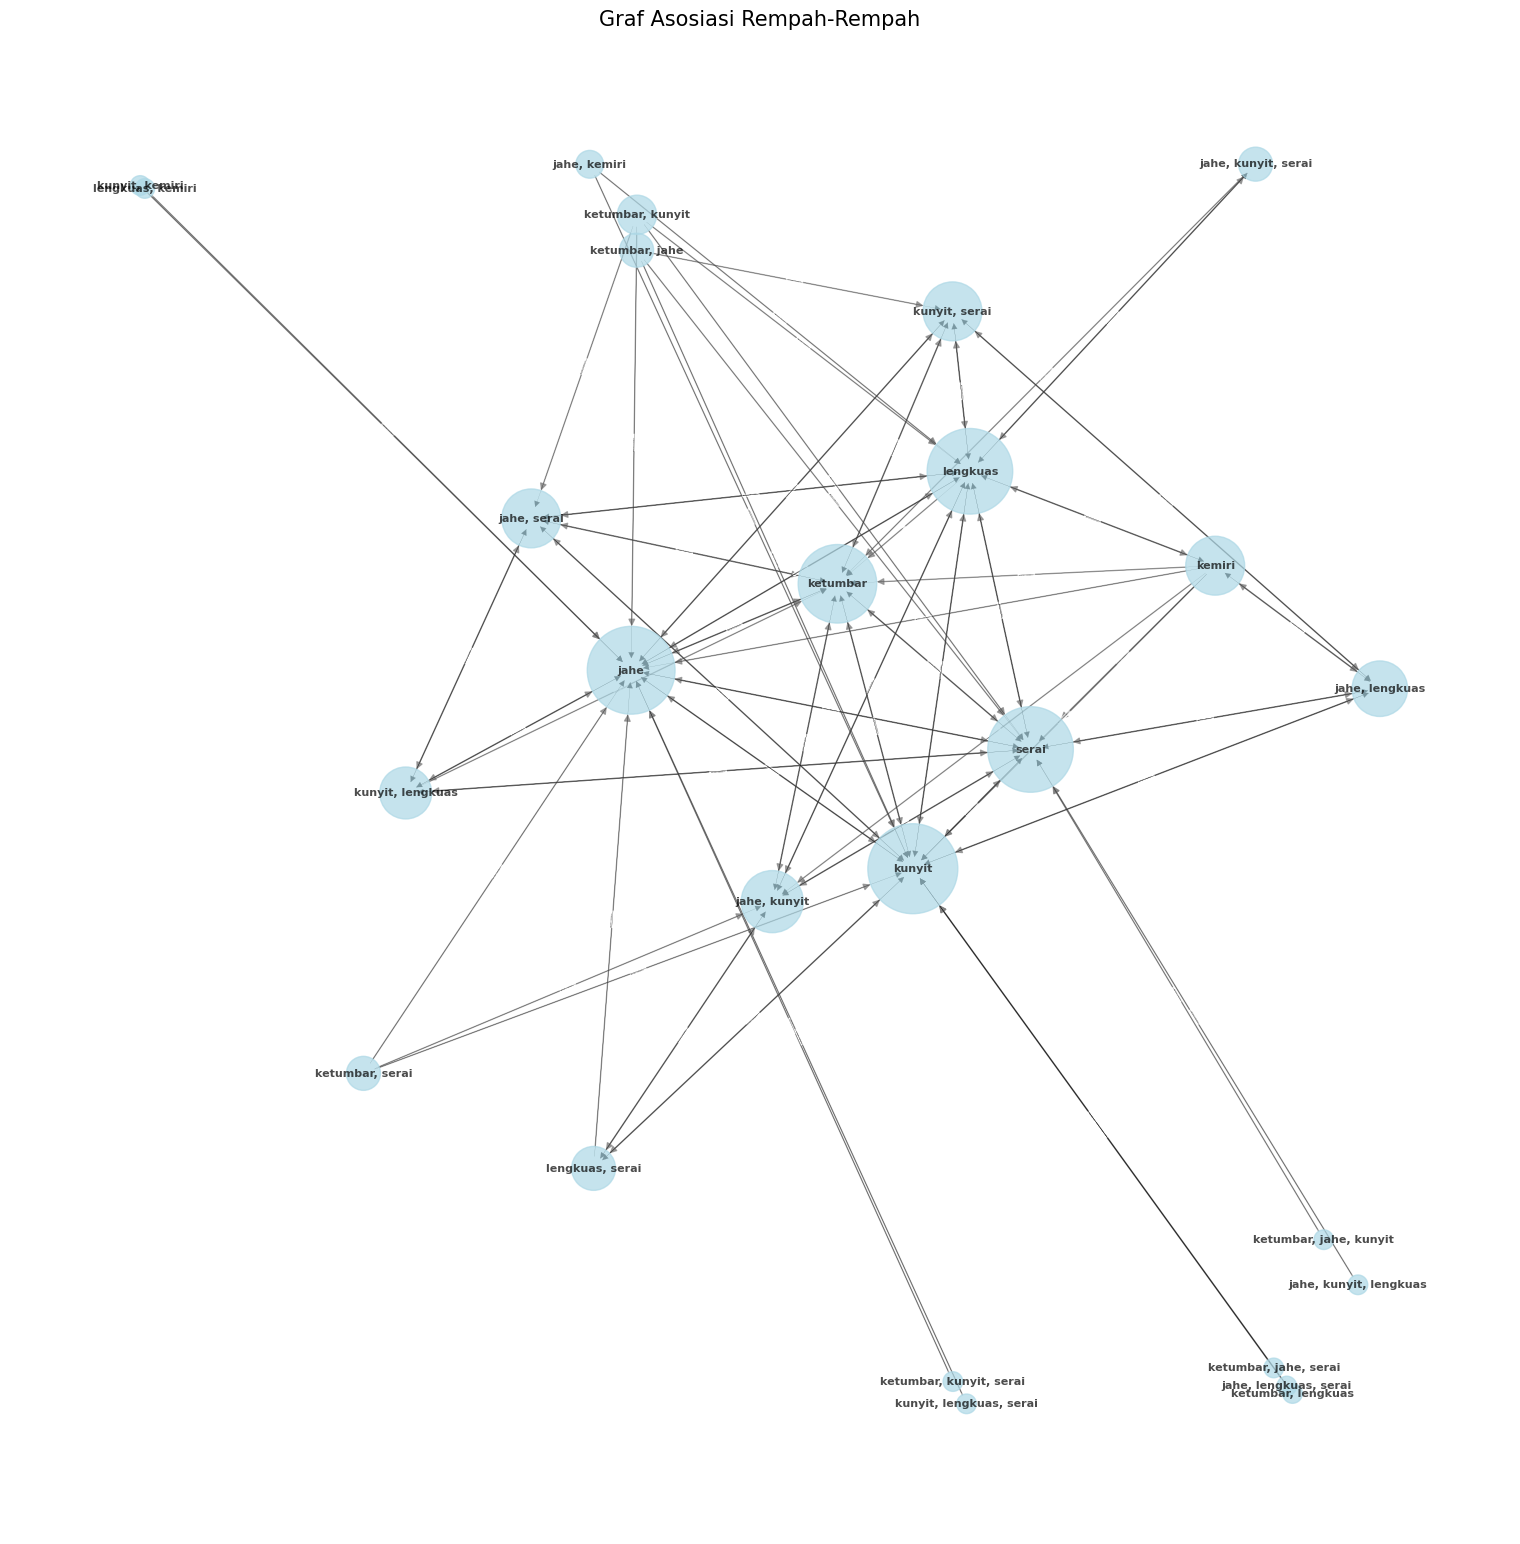

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

data = df['rempah_terpilih'].str.split(', ')

# Transformasi data ke dalam format yang bisa diproses (one-hot encoded)
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

# Lakukan apriori untuk mencari kombinasi rempah yang sering muncul bersama
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Buat aturan asosiasi berdasarkan confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Tampilkan hasil aturan asosiasi
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

import matplotlib.pyplot as plt
import networkx as nx

# Menggunakan hasil dari asosiasi (rules) yang sudah didapat
G = nx.DiGraph()

# Tambahkan edge dari aturan asosiasi
for idx, row in rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['confidence'])

# Tentukan ukuran node berdasarkan centrality
node_size = [G.degree(node) * 200 for node in G.nodes()]

# Buat layout graf yang lebih teratur
pos = nx.kamada_kawai_layout(G)

# Visualisasi node dengan ukuran proporsional dan transparansi
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color="lightblue",
        font_size=8, font_weight="bold", edge_color="gray", alpha=0.7, arrows=True)

# Tambahkan edge labels (misalnya confidence atau lift)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=0)

# Sesuaikan tebal edge sesuai dengan bobot
edges = G.edges(data=True)
# Mengurangi ketebalan garis, misalnya dengan membagi weight dengan 10
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] / 5 for (u, v, d) in edges])

# Tampilkan plot
plt.title("Graf Asosiasi Rempah-Rempah", fontsize=15)
plt.show()

In [6]:
# Memisahkan setiap judul menjadi kata-kata individual
semua_kata = [kata for judul in df['Judul Resep'] for kata in judul.split()]

# Menghitung frekuensi kata
freq = Counter(semua_kata)

# Menampilkan semua kata
print("Semua kata dalam judul resep:")
print(semua_kata)

# Menampilkan 5 kata yang paling sering muncul
print("\n5 kata yang paling sering muncul:")
print(freq.most_common(5))

Semua kata dalam judul resep:
['Mie', 'Aceh', 'Ayam', 'Tangkap', 'Pacri', 'Nanas', 'Gulai', 'Kambing', 'Bubur', 'Kanji', 'Rumbi', 'Tumis', 'Keumamah', 'Soto', 'Aceh', 'Kuah', 'Sie', 'Itek', 'Kuah', 'Plik', 'Eungkot', 'Suree', 'Gulai', 'Patarana', 'Aceh', 'Soto', 'Medan', 'Soto', 'Udang', 'Medan', 'Mi', 'Sop', 'Medan', 'Tauco', 'Udang', 'Tahu', 'Mi', 'Rebus', 'Medan', 'Sate', 'Kerang', 'Arsik', 'Ikan', 'Mas', 'Mi', 'Balap', 'Medan', 'Balado', 'Teri', 'Medan', 'Lontong', 'Medan', 'Pempek', 'Palembang', 'Pindang', 'Tulang', 'Iga', 'Daging', 'Malbi', 'Semur', 'Burgo', 'Pindang', 'Patin', 'Mie', 'Celor', 'Model', 'Ikan', 'Palembang', 'Laksan', 'Celimpungan', 'Ragit', 'Rendang', 'Ayam', 'Pop', 'Soto', 'Padang', 'Sayur', 'Nangka', 'Gulai', 'Kepala', 'Kakap', 'Ikan', 'Patin', 'Asam', 'Padeh', 'Dendeng', 'Cabai', 'Hijau', 'Gulai', 'Tunjang', 'Gulai', 'Otak', 'Gulai', 'Daun', 'Singkong', 'Asam', 'Pedas', 'Ikan', 'Baung', 'Miso', 'Bacah', 'Daging', 'Ikan', 'Cuka', 'Mie', 'Lendir', 'Mie', 'Tarempa

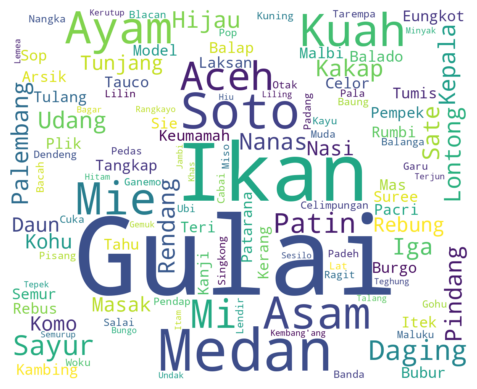

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

mask = np.array(Image.open(
                r'/content/drive/MyDrive/Colab Notebooks/kunyit.png'))

# Membuat word cloud
wordcloud = WordCloud(mask = mask,
               background_color = "white",
               max_words = 2000,
               max_font_size = 500,
               random_state = 42,
               width = mask.shape[1],
               height = mask.shape[0]).generate(' '.join(semua_kata))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()